In [30]:
import numpy as np
import pandas as pd
import scipy
import random
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
from celluloid import Camera
import pymc as pm
import aesara.tensor as T
import aesara
import arviz as az
import graphviz 
import pytensor
import pytensor.tensor as pt

aesara.config.compute_test_value = 'off' 

RANDOM_SEED = 123
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [31]:
with pm.Model() as model:
    # Prior for mu_theta
    mu_theta = pm.Normal('mu_theta', mu=0, sigma=10)
    # Prior for sigma_theta
    sigma_theta = pm.HalfNormal('sigma_theta', sigma=10)
    # Prior for theta
    theta = pm.Normal('theta', mu=mu_theta, sigma=sigma_theta)

In [32]:
with model:
    trace = pm.sample(draws= 10000, chains=8, target_accept = 0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 4 jobs)
NUTS: [mu_theta, sigma_theta, theta]


Sampling 8 chains for 1_000 tune and 10_000 draw iterations (8_000 + 80_000 draws total) took 32 seconds.
There were 895 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7198, but should be close to 0.9. Try to increase the number of tuning steps.
There were 828 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.821, but should be close to 0.9. Try to increase the number of tuning steps.
There were 522 divergences after tuning. Increase `target_accept` or reparameterize.
There were 478 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8386, but should be close to 0.9. Try to increase the number of tuning steps.
There were 917 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the targ

array([[<AxesSubplot:title={'center':'mu_theta'}>,
        <AxesSubplot:title={'center':'mu_theta'}>],
       [<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>],
       [<AxesSubplot:title={'center':'sigma_theta'}>,
        <AxesSubplot:title={'center':'sigma_theta'}>]], dtype=object)

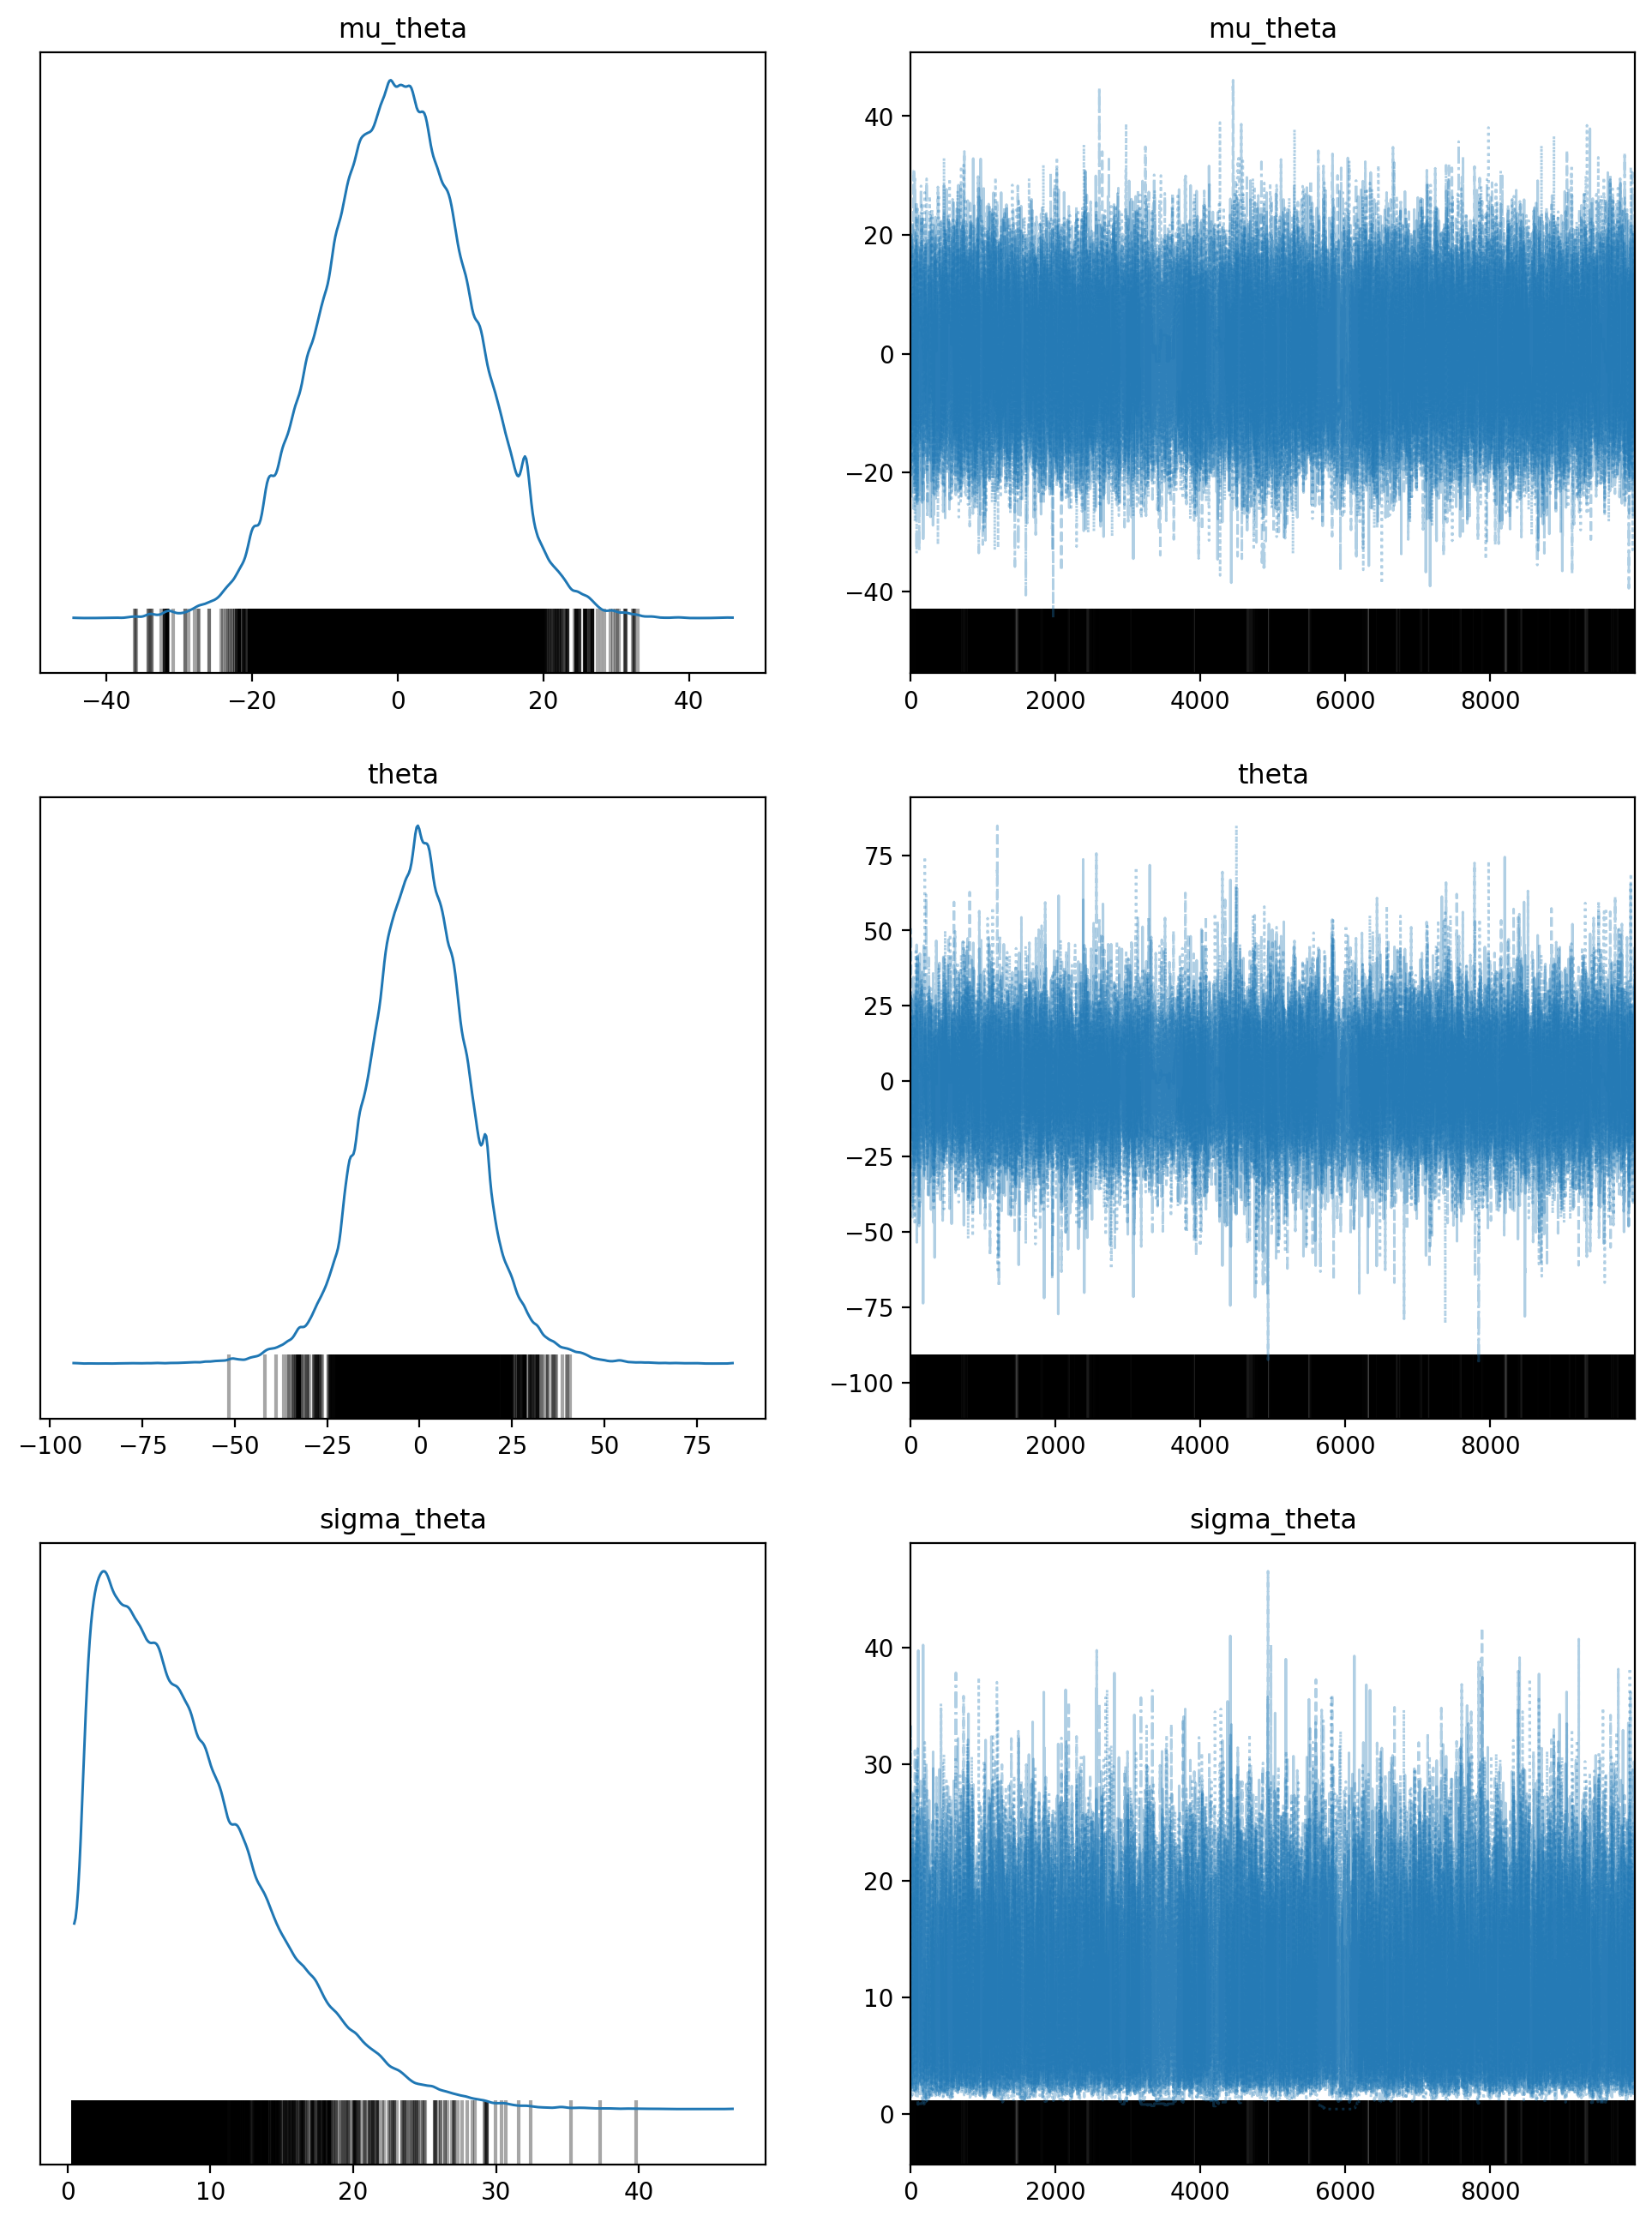

In [33]:
plt.style.use('default')
pm.plot_trace(trace, filter_vars="like", combined=True, kind="trace", figsize = (12,16))